In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats
import seaborn.apionly as sns

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral":"Adipose.V",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Heart",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed": "SkinUnexposed",
    "Skin-SunExposed":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral":"orange",
    "Brain-Caudate":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed":"blue",
    "Skin-SunExposed":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m",
    "permuted": "gray"
}

TFs = ['ZSCAN29', 'NFYB', 'IRF5', 'H4K20me1', 'H3K79me2', 'GABPA', 'ETV6', 'ESRRA', 'BHLHE40', 'TBP', 'BRCA1', 'CTCF', 'CBX5', 'NFXL1', 'IKZF2', 'EED', 'SKIL', 'H3K4me2', 'ZBED1', 'NR2C1', 'TBX21', 'POLR2A', 'RAD21', 'H3K4me1', 'MAZ', 'PKNOX1', 'POLR2AphosphoS2', 'ZNF592', 'MXI1', 'ASH2L', 'USF1', 'NRF1', 'E2F4', 'JUND', 'RAD51', 'BATF', 'IKZF1', 'SIN3A', 'MAX', 'CHD2', 'ZNF217', 'RCOR1', 'MYB', 'MYC', 'TCF12', 'TBL1XR1', 'ATF7', 'EP300', 'EGR1', 'MEF2C', 'MAFK', 'BCLAF1', 'CHD1', 'NFIC', 'HCFC1', 'H3K36me3', 'ZNF384', 'JUNB', 'RFX5', 'ELK1', 'SMAD5', 'ZBTB40', 'H3K27me3', 'MLLT1', 'CREM', 'BACH1', 'CUX1', 'SMC3', 'EBF1', 'CBFB', 'ARID3A', 'BMI1', 'H3K9ac', 'STAT3', 'SMARCA5', 'CHD7', 'ZNF24', 'SP1', 'HDGF', 'WRNIP1', 'FOXK2', 'NR2F1', 'TARDBP', 'NFYA', 'H3K4me3', 'RELB', 'ELF1', 'GATAD2B', 'ATF2', 'STAT1', 'TCF7', 'H3K27ac', 'DPF2', 'USF2', 'H2AFZ', 'SPI1', 'RB1', 'ZEB1', 'ZNF687', 'RUNX3', 'MTA2', 'TRIM22', 'TAF1', 'BCL11A', 'IRF3', 'ZNF143', 'NBN', 'ZNF207', 'MTA3', 'POLR2AphosphoS5', 'HSF1', 'KDM5A', 'YBX1']
Tissues =[]
eSTRs = []
eSTRsll =[]
causal = []
topstr = []
causalestr = []
sample = []
anova = []
shared = []
merged_t = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/LR_SummaryTest_Table.tsv', sep='\t')

In [17]:
for T in sorted(SHORTEN.keys()):
    #print(T)
    summary = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'+T+'/Master.table', sep='\t')
    coor = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'+T+'/Corr_Expr.csv')
    sample.append(coor.shape[0])
    Tissues.append(' '.join(T.split('-')))
    eSTRs.append(summary.loc[summary['qvalue']<0.1].shape[0])
    eSTRsll.append(summary.loc[summary['llqvalue']<0.1].shape[0])
    causal.append(summary.loc[summary['caviar.score']>0.5].shape[0])
    summary['top.variant'] = summary['top.variant'].astype(str)
    summary['top'] = summary['top.variant'].apply(lambda x: 1 if "STR" in x else 0)
    topstr.append(summary.loc[summary['top']==1].shape[0])
    causalestr.append(summary.loc[(summary['qvalue']<0.1) & (summary['top']==1)].shape[0])
    anova.append(summary.loc[(summary['anova_pval']<=0.05)&(summary['delta_aic']>0)&(summary['significant']==1)].shape[0])
    shared.append(merged_t.loc[(merged_t['E.tissues']>1 )&( merged_t['eSTR.'+SHORTEN[T]]==1)].shape[0])

In [38]:
Table=pd.DataFrame({"Tissue":Tissues,"Sample size":sample ,"Number eSTRs":eSTRs, "share.eSTRs":shared,"Locus eSTRs":eSTRsll, "Anova.eSTRs":anova,"Causal>0.5":causal, "STR.top.caviar":topstr, "causal.eSTRs":causalestr} )
Table['id']= sorted(SHORTEN.keys())
#Table['num.best.caviar'] = Table['id'].apply(lambda x: list(eSTR["best.tissue"]).count(x))
Table['col'] = Table['id'].apply(lambda x: COLORS[x])
Table['%Causal.eSTRs'] = Table["causal.eSTRs"]*100/Table['Number eSTRs']
Table = Table[["Tissue", "Sample size","Number eSTRs","share.eSTRs","Anova.eSTRs","causal.eSTRs","Causal>0.5",'%Causal.eSTRs',"STR.top.caviar","Locus eSTRs","id", "col"]].sort_values("Number eSTRs", ascending=False)
Table['%shared'] = Table["share.eSTRs"]*100/Table["Number eSTRs"]
print(sum(Table['%shared'])/17)
Table

67.92129000552234


,Tissue,Sample size,Number eSTRs,share.eSTRs,Anova.eSTRs,causal.eSTRs,Causal>0.5,%Causal.eSTRs,STR.top.caviar,Locus eSTRs,id,col,%shared
12,Nerve Tibial,265,2191,1434,773,170,12,7.759014,4877,5583,Nerve-Tibial,gold,65.449566
15,Thyroid,262,2034,1278,711,164,10,8.062930,5253,5111,Thyroid,green,62.831858
14,Skin SunExposed,297,1955,1274,617,180,9,9.207161,5109,5043,Skin-SunExposed,cornflowerblue,65.166240
0,Adipose Subcutaneous,270,1789,1268,589,178,12,9.949693,5589,4517,Adipose-Subcutaneous,darkorange,70.877585
3,Artery Tibial,276,1689,1190,611,170,9,10.065127,4990,4064,Artery-Tibial,red,70.455891
7,Esophagus Mucosa,255,1687,1059,565,157,9,9.306461,5658,4397,Esophagus-Mucosa,sienna,62.774155
11,Muscle Skeletal,343,1665,1037,554,150,10,9.009009,5273,4156,Muscle-Skeletal,mediumslateblue,62.282282
6,Cells Transformedfibroblasts,225,1518,987,507,162,12,10.671937,5361,3566,Cells-Transformedfibroblasts,skyblue,65.019763
10,Lung,259,1413,1020,450,149,10,10.544940,5490,3457,Lung,greenyellow,72.186837
8,Esophagus Muscularis,214,1374,963,476,155,6,11.280932,5421,3312,Esophagus-Muscularis,burlywood,70.087336


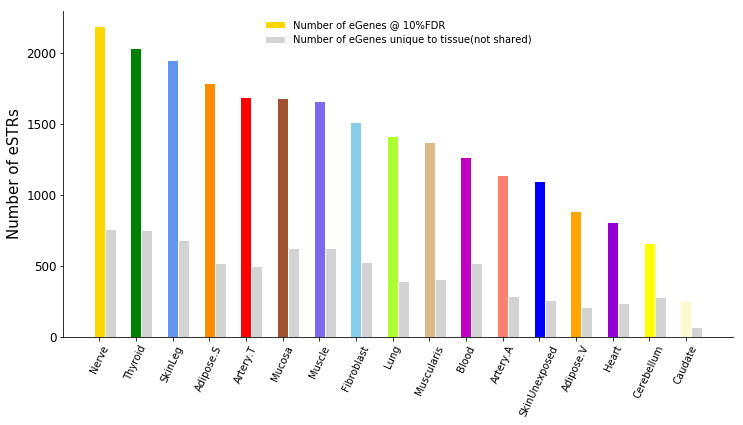

In [37]:
xvals = np.array(range(len(Tissues)))
w=0.3
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
bars1 = ax.bar(xvals, Table["Number eSTRs"], color=list(Table['col']), edgecolor="white", width=w, label="Number of eGenes @ 10%FDR")
bars2 = ax.bar(xvals+w, Table["Number eSTRs"]-Table["share.eSTRs"], color="lightgray", edgecolor="white", width=w, label="Number of eGenes unique to tissue(not shared)")
ax.set_xticks(xvals)
ax.set_xticklabels([SHORTEN[x] for x in Table["id"]], size=10, rotation=65);
ax.set_ylabel("Number of eSTRs", size=15)
ax.set_yticklabels([int(x) for x in ax.get_yticks()], size=12);
ax.legend(loc="upper center", frameon=False);
plt.show()

In [11]:
Table['percent_anova'] = Table['AnovaeSTR']*100/Table['Gene Level eSTRs']
Table[["Tissue", "Sample size","Gene Level eSTRs","causal.estr","percent_anova"]].sort_values('Sample size', ascending=False)
sum(Table['percent_anova'])/17

32.07204087918386

In [41]:
#summary.loc[(summary['anova_pval']<=0.05)&(summary['delta_aic']>0)&(summary['significant']==1)]  #1244     #lower aic the better  snp - (str+snp)
merged_t.loc[merged_t['E.tissues']>=10].shape
set(list(merged_t['chrom']))

{'chr1',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr2',
 'chr20',
 'chr21',
 'chr22',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9'}

In [12]:
sec_tfs = list(set(summary.loc[summary['gene.name'].isin(TFs)]['gene'])) 
print(sec_tfs)#summary.transpose()
transfact = summary.loc[summary['gene.name'].isin(TFs)][['chrom','gene','gene.name', 'str.start', 'str.end','motif']].copy()

topscores = S.loc[S['gene'].isin(sec_tfs)]
topscores['str.start']=topscores['best.str.start']
pd.merge(topscores, transfact, on=['chrom','gene', 'str.start'], how='left')

#PKNOX1   TG repeats on exon 10 according to GB. Here motif is AC
#chr10:31662123-31662147    Intron TG repeat
#chr16:67202379-67202467    Intron   AAAG repeat
#chr20:52147400-52147450    Just upstream of zinc finger
#chr5:92924483-92924541     #NR2F1 ligand inducible transcription factor that is involved in the regulation of many different genes     
                            #AC or TG intronic repeat
#chr12:54712224-54712238*
#chr12:11772099-11772119
#chr19:3469156-3469180

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,gene,chrom,best.str.start,best.score,best.q,top.variant,best.tissue,NumTissues,best.llq,str.start,gene.name,str.end,motif
0,ENSG00000057935.9,chr2,42897885.0,0.425474,0.004279,STR_42897885,Cells-Transformedfibroblasts,17,0.001455,4.28979e+07,MTA3,42897904,AT
1,ENSG00000160199.10,chr21,44450371.0,0.177500,0.074254,STR_44450371,Brain-Cerebellum,17,0.019758,4.44504e+07,PKNOX1,44450421,AC
2,ENSG00000148516.17,chr10,31662123.0,0.109003,0.098215,STR_31662123,Lung,17,0.047840,3.16621e+07,ZEB1,31662147,AC
3,ENSG00000067955.9,chr16,67202379.0,0.148722,0.036201,STR_67202379,Muscle-Skeletal,17,0.019803,6.72024e+07,CBFB,67202467,AAAG
4,ENSG00000171940.9,chr20,52147400.0,0.127183,0.109939,STR_52147400,Adipose-Subcutaneous,17,0.016066,5.21474e+07,ZNF217,52147450,AC
5,ENSG00000175745.7,chr5,92924483.0,0.635719,0.003510,STR_92924483,Skin-SunExposed,17,0.002616,9.29245e+07,NR2F1,92924541,AC
6,ENSG00000094916.9,chr12,54712224.0,0.134401,0.007300,STR_54712224,Esophagus-Mucosa,17,0.008245,5.47122e+07,CBX5,54712238,AT
7,ENSG00000139083.6,chr12,11772099.0,0.116184,0.066699,STR_11772099,Skin-NotSunExposed,17,0.027586,1.17721e+07,ETV6,11772119,A
8,ENSG00000141905.13,chr19,3469156.0,0.385717,0.006345,STR_3469156,Adipose-Subcutaneous,17,0.001113,3.46916e+06,NFIC,3469180,A


In [ ]:
summary=pd.read_csv("/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Merged_Best_causality.Table", sep='\t')
eSTR = summary.loc[summary['best.q']<0.1].copy()
S = summary.loc[summary['best.score']>0.6].copy()
print(S.shape)  #There are 1147 eSTRs with more than 10% causality scores
print("eSTR high causal  ", S.loc[S['best.q']<=0.1].shape)
#Are there any transcription factor within this set opf high causal scoring eSTRs? (in S)
print(summary.loc[summary['best.q']<0.1].shape)

for T in sorted(SHORTEN.keys()):
    print(T, '\t',list(eSTR["best.tissue"]).count(T))


topscores = S.loc[S['gene'].isin(sec_tfs)]
chr10:31662123-31662147
chr16:67202379-67202467
chr20:52147400-52147450
chr5:92924483-92924541
chr12:54712224-54712238
chr12:11772099-11772119
chr19:3469156-3469180